1.1 K-Mean Clustering
k-Means Clustering is a method that divides a data set into k clusters. K-Means Clustering is one of the most straightforward and commonly used clustering algorithms. In this method, the user predefines the number of clusters (k) to indicate the number of groups for division in the data set. 

The objective of the k-Means Clustering is to find a benchmark data point for each cluster; then assign all the data points to the nearest benchmark data point, i.e., denoted as the centroid (cluster's center), which then forms a cluster. The cluster centroid does not have to be an actual data point in the data set. It can be a simulated data point that represents the characteristics of all data points within the cluster.

In [1]:
import pandas as pd 
df = pd.read_csv('Iris.csv')

Transform categorical 'Species' data type to numeric

In [2]:
df.loc[df['Species'] == 'Iris-setosa', 'Species'] = 1 
df.loc[df['Species'] == 'Iris-versicolor', 'Species'] = 2 
df.loc[df['Species'] == 'Iris-virginica', 'Species'] = 3

import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

Identify optimal k using the Elbow Curve method

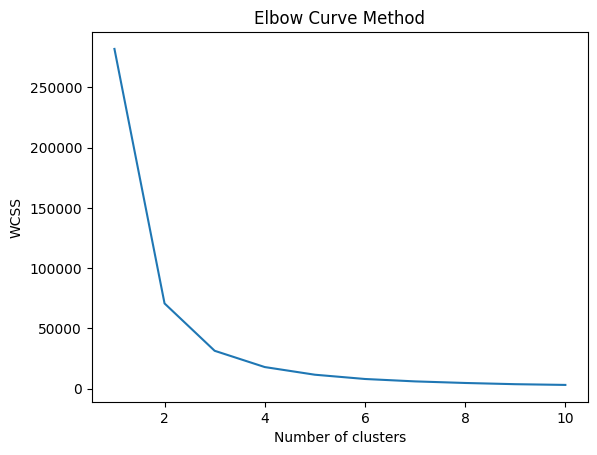

<Figure size 640x480 with 0 Axes>

In [3]:
wcss = []
for i in range(1, 11):   # specified a range for the Elbow Curve x-axis
    model_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    model_elbow.fit(df) 
    wcss.append(model_elbow.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
strFile = "plot_elbow.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig(strFile)
plt.clf()

Save the data into a CSV file 

In [4]:
df.to_csv('IrisElbowCurve.csv')

identify the Silhouette scores according a range to include Elbow Curve finding

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score


 take a range to include ELbow Curve finding 

In [6]:
range_n_clusters = [2,3,4] 

silhouette_avg_n_clusters = [] 
for n_clusters in range_n_clusters: 
    # Initialize the clusterer with n_clusters value and a random generator seed 10 for reproducibility. 
    model_silhouette = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=10) 
    model_silhouette = model_silhouette.fit_predict(df)

The silhouette_score gives the average value for all the samples,ie. density and separation of the formed clusters 

In [7]:
silhouette_avg = silhouette_score(df, model_silhouette) 
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg.round(4)) 
silhouette_avg_n_clusters.append(silhouette_avg.round(4))

For n_clusters = 4 The average silhouette_score is : 0.5563


alternately we can plot the k and respecitve silhouette score

For n_clusters = 2 The average silhouette_score is: 0.6204
For n_clusters = 3 The average silhouette_score is: 0.5824
For n_clusters = 4 The average silhouette_score is: 0.5563


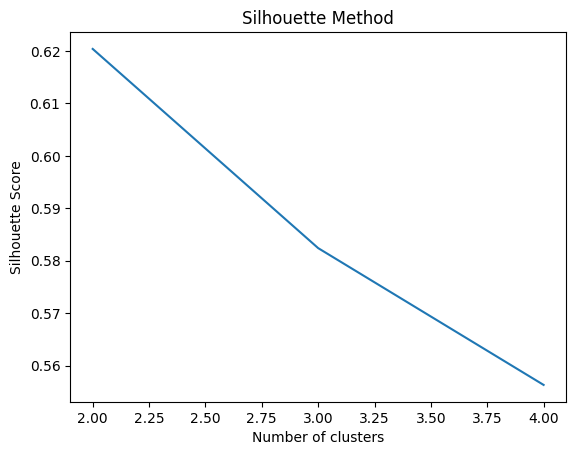

<Figure size 640x480 with 0 Axes>

In [8]:
#From ChatGPT code fix
range_n_clusters = [2,3,4] 
silhouette_avg_n_clusters = [] 

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed for reproducibility.
    model_silhouette = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=10)
    model_silhouette = model_silhouette.fit_predict(df)

    # The silhouette_score gives the average value for all the samples, i.e., density and separation of the formed clusters
    silhouette_avg = silhouette_score(df, model_silhouette)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg.round(4))
    silhouette_avg_n_clusters.append(silhouette_avg.round(4))

plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
strFile = "plot_silhouette.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig(strFile) 
plt.clf()  

k=3 (suggested by the Elbow Curve method)
k=2 (suggested by the Silhouette method)

to plot/compre clusters of different k generated by Elbow curve and Silhouette

In [9]:
fig = plt.figure(figsize=(50, 35))


<Figure size 5000x3500 with 0 Axes>

Plot Elbow Curve k clusters

In [10]:
k = 3 # k=3 suggested by the Elbow Curve
model_k = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) #random_state=42) 
df_kmeans = model_k.fit_predict(df)   

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df.loc[df_kmeans == 0]['SepalLengthCm'], df.loc[df_kmeans == 0]['PetalLengthCm'], df.loc[df_kmeans == 0]['PetalWidthCm'],
            s=600, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
ax1.scatter(df.loc[df_kmeans == 1]['SepalLengthCm'], df.loc[df_kmeans == 1]['PetalLengthCm'], df.loc[df_kmeans == 1]['PetalWidthCm'],
            s=600, c='yellow', marker='o', edgecolor='black', label='Cluster 2')
ax1.scatter(df.loc[df_kmeans == 2]['SepalLengthCm'], df.loc[df_kmeans == 2]['PetalLengthCm'], df.loc[df_kmeans == 2]['PetalWidthCm'],
            s=600, c='red', marker='*', edgecolor='black', label='Cluster 3')

#ax1.view_init(30, -70)

In [11]:
ax1.set_xlabel("SepalLengthCm", fontsize=50)
ax1.set_ylabel("PetalLengthCm", fontsize=50)
ax1.set_zlabel("PetalWidthCm", fontsize=50)
ax1.set_title("Elbow Curve Clusters", fontsize=70)
ax1.legend(loc='upper center', prop={'size':45}, bbox_to_anchor=(0.5, -0.08), ncol=3)

Plot Silhouette k clusters

In [12]:
k = 2 # k=2 suggested by Silhouette
model_k = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) #random_state=42) 
df_kmeans = model_k.fit_predict(df)   

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df.loc[df_kmeans == 0]['SepalLengthCm'], df.loc[df_kmeans== 0]['PetalLengthCm'], df.loc[df_kmeans == 0]['PetalWidthCm'],
            s=600, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
ax2.scatter(df.loc[df_kmeans == 1]['SepalLengthCm'], df.loc[df_kmeans== 1]['PetalLengthCm'], df.loc[df_kmeans == 1]['PetalWidthCm'],
            s=600, c='yellow', marker='o', edgecolor='black', label='Cluster 2')

ax1.view_init(30, -70)

In [13]:
ax2.set_xlabel("SepalLengthCm", fontsize=50)
ax2.set_ylabel("PetalLengthCm", fontsize=50)
ax2.set_zlabel("PetalWidthCm", fontsize=50)
ax2.set_title("Silhouette Clusters", fontsize=70)
ax2.legend(loc='upper center', prop={'size':45}, bbox_to_anchor=(0.5, -0.08), ncol=3)

fig.show()

strFile = "plot_compare_clusters.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig(strFile)
plt.clf()

<Figure size 640x480 with 0 Axes>

Interpret point: Cluster 1 contains the data points with a shorter size in Petal length and width compared to the other two clusters, 
and its Sepal length is concentrated in a shorter length. Cluster 3 poses data points with larger Petal length and width than the other clusters, 
with various Sepal lengths. Cluster 2 demonstrates a group of data points with a larger Petal length than Cluster 1 but a smaller Petal width than Cluster 3. 

References:

The following links are from the official website of sci-kit Learn, which I find helpful for implementing a clustering approach using Python codes. 

To understand all the possible parameters of k-Means and their descriptions: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Example of k-Means clustering: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html?highlight=cluster

For additional reference of different clustering algorithms (optional): https://scikit-learn.org/stable/modules/clustering.html?highlight=cluster